<h1 style="background-color:Green;font-size:36pt;color:white">Data Visualization - Area Plots, Histograms, and Bar Plots</h1>

## Giusseppe Benito Bervis Quintero
### León, Nicaragua - 2022

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Getting the Dataset](#0)<br>
2. [Area Plots](#2) <br>
3. [Histograms](#3) <br>
4. [Bar Charts](#4) <br>

</div>


# 1. Getting the Dataset <a id="0"></a>

Dataset Source: [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. The current version presents data pertaining to 45 countries.

The Canada Immigration dataset can be fetched from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01">here</a>.

In [1]:
# Uploading necesary packages
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# Uploading packages for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot']) # optional: for ggplot-like style

In [3]:
# Importing the dataset
df_can = pd.read_excel('Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), nrows = 195, usecols = "A:AQ",
     engine='openpyxl')

# Removing some columns
df_can.drop(['Type','Coverage', 'AREA','REG','DEV'], axis = 1, inplace = True)

# Rename some columns
df_can.rename(columns = {'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace = True)

# Calculating the total of inmigrants contribution by country
df_can['Total'] = df_can[range(1980, 2014)].sum(axis = 1)

# Seting the countrie's name as index
df_can.set_index('Country', inplace=True)

df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


# 2. Area Plots <a id="2"></a>

Compare the trend of top 5 countries that contributed the most to immigration to Canada, using Area plot.

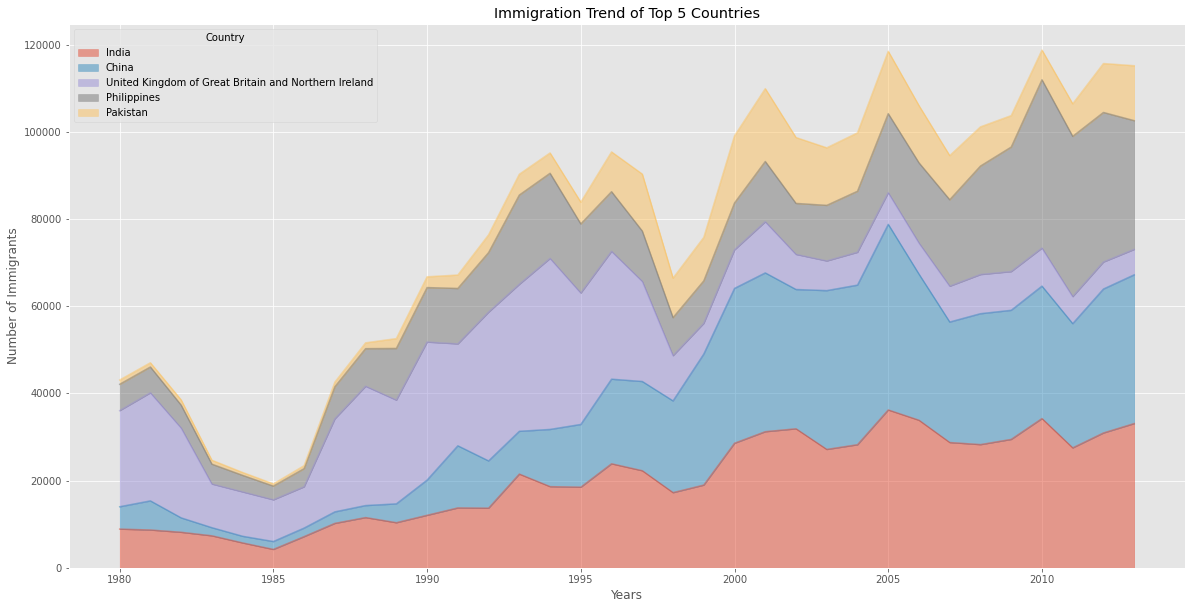

In [18]:
# Sorting the data by the contribution of inmigrants
df_sorted = df_can.sort_values(by = 'Total', ascending = False)

# Getting the top 5 entries
df_top5 = df_sorted[range(1980, 2014)].head().transpose()

# Plotting
ax = df_top5.plot(kind = 'area', 
             alpha = 0.5,  # 0 - 1, default value alpha = 0.5
             figsize = (20, 10)
            )

# Labels
ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

plt.show()

Use the artist layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.45.

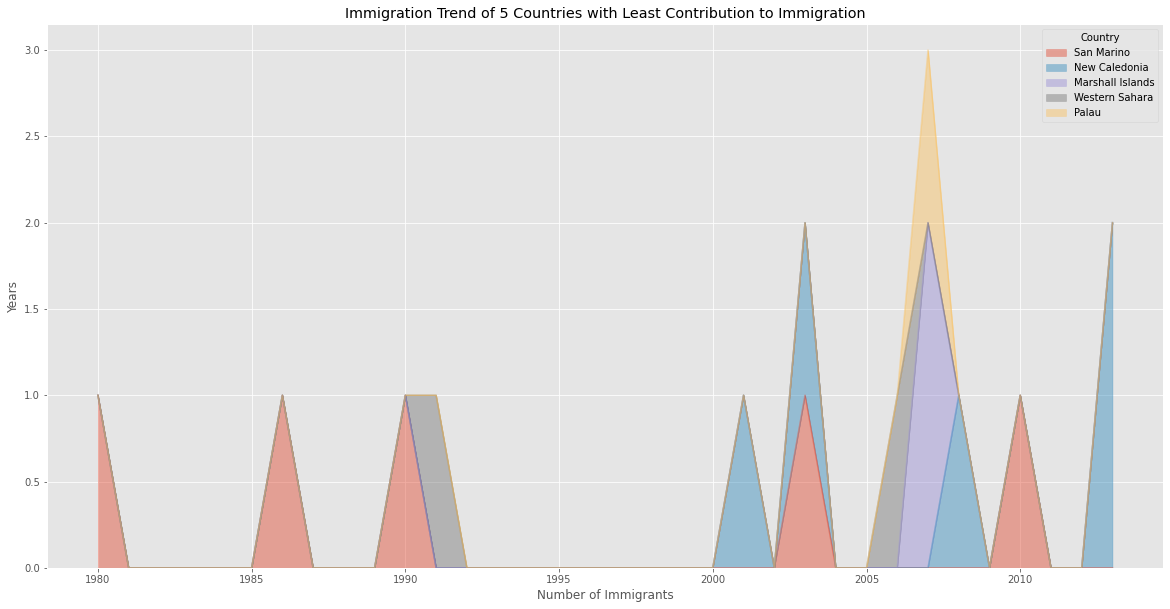

In [25]:
# Getting the 5 countries with Least Contribution to Immigration
df_bottom = df_sorted[range(1980, 2014)].tail().transpose()

# Plotting
bx = df_bottom.plot(kind = 'area',
                   alpha = 0.45, 
                   figsize=(20, 10))

# labels
bx.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
bx.set_xlabel('Number of Immigrants')
bx.set_ylabel('Years')

plt.show()

Use the script layer to create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.55.

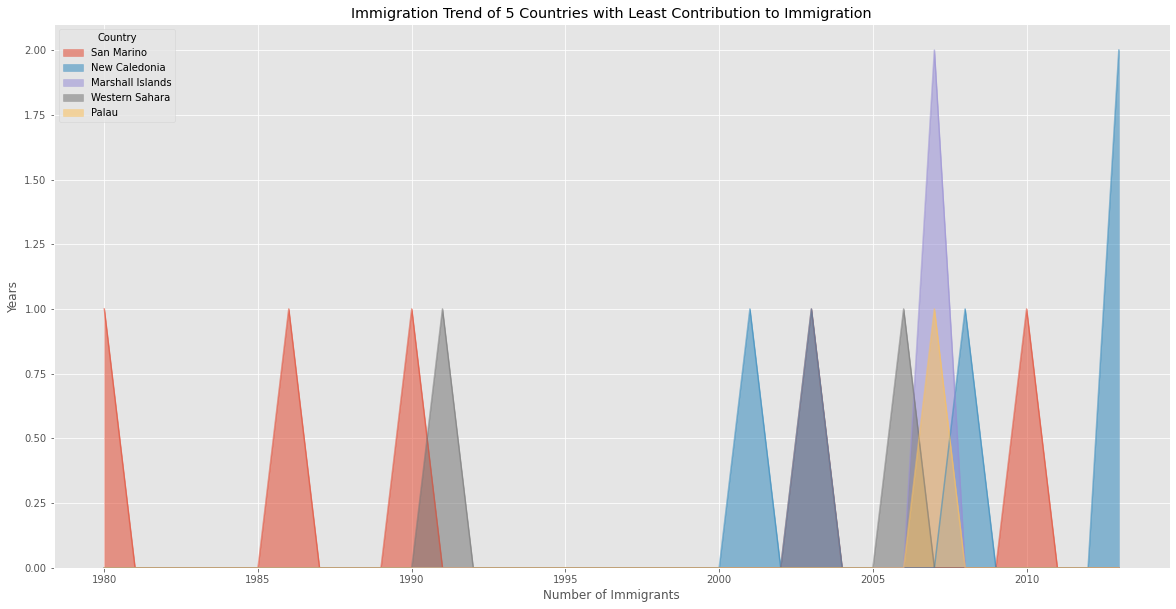

In [27]:
# Getting the 5 countries with Least Contribution to Immigration
df_bottom = df_sorted[range(1980, 2014)].tail().transpose()

# Plotting
df_bottom.plot(kind = 'area',
               alpha = 0.55,
               figsize = (20, 10), 
               stacked = False)

# labels
plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.xlabel('Number of Immigrants')
plt.ylabel('Years')

plt.show()

# 3. Histograms <a id="3"></a>

Make an histogram of the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013

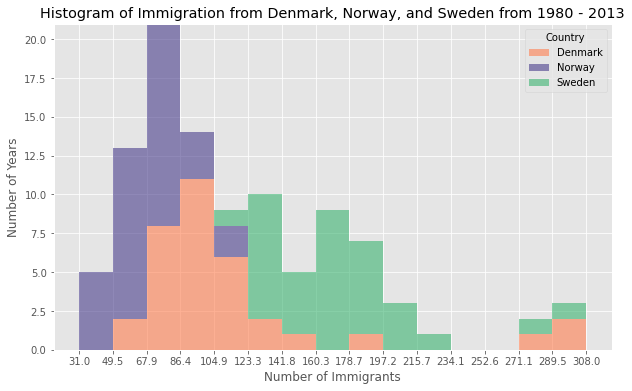

In [42]:
# Taking the data
data_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], range(1980, 2014)].transpose()

# Generate histogram
data_countries.plot(kind = 'hist',
                    figsize = (10,6),
                    bins = 15,
                    alpha = 0.6,
                    xticks = np.histogram(data_countries, 15)[1], 
                    color = ['coral', 'darkslateblue', 'mediumseagreen'], 
                    stacked = True)

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

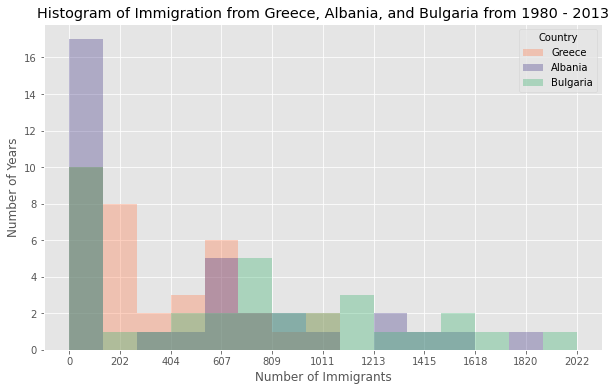

In [52]:
# Taking the data
data_GAB = df_can.loc[['Greece', 'Albania', 'Bulgaria'], range(1980, 2014)].transpose()

d, n_bins = np.histogram(data_GAB)
# Plotting
data_GAB.plot(kind = 'hist',
              alpha = 0.35,
              bins = 15,
              figsize = (10, 6),
              xticks = n_bins,
              color=['coral', 'darkslateblue', 'mediumseagreen'])

# Labels
plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

# 4. Bar Charts <a id="4"></a>

The 2008 - 2011 Icelandic Financial Crisis was a major economic and political event in Iceland. Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. The crisis led to a severe economic depression in 2008 - 2011 and significant political unrest.

Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.

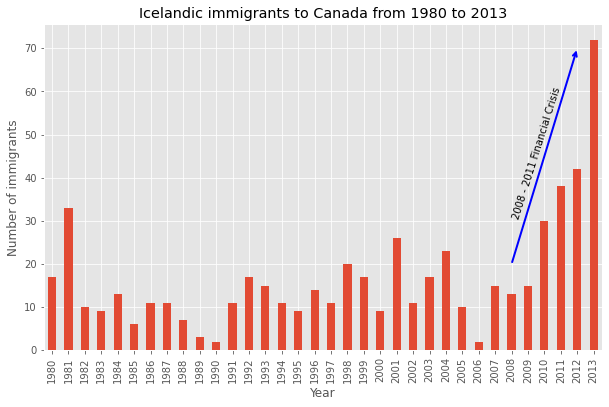

In [59]:
# Getting the data
df_iceland = df_can.loc['Iceland', range(1980, 2014)]

# Plotting
df_iceland.plot(kind = 'bar', 
                figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy = (32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext = (28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords = 'data',  # will use the coordinate system of the object being annotated
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

Using the scripting later and the `df_can dataset`, create a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

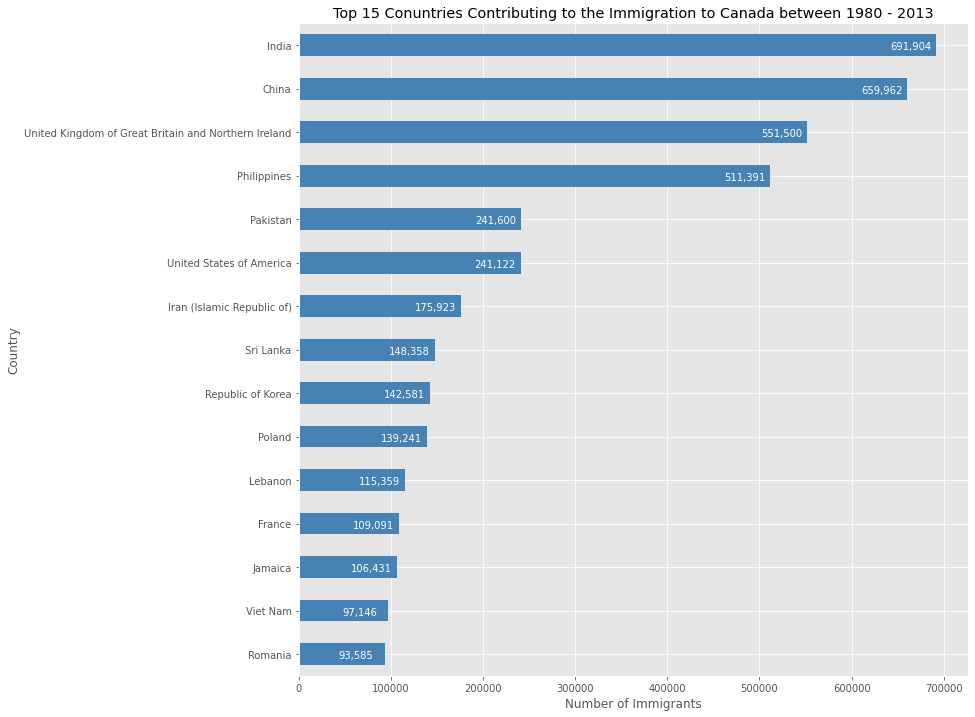

In [89]:
# Getting the data
df_sorted1 = df_can.sort_values(by = 'Total', ascending = True)
df_top15 = df_sorted1.tail(15)['Total']

# Plotting
df_top15.plot(kind = 'barh',
              figsize = (12, 12),
              color = 'steelblue')

# Labels
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas

    # place text at the end of bar (subtracting 50000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy = (value - 50000, index - 0.10), color = 'white')

plt.show()